# EMAIL SPAM DETECTION WITH MACHINE LEARNING

# Spam Detection

* Spam detection means detecting spam messages or emails by understanding text content so that you can only receive notifications about messages or emails that are very important to you. 
* If spam messages are found, they are automatically transferred to a spam folder and you are never notified of such alerts. This helps to improve the user experience, as many spam alerts can bother many users.
* In this project i using the machine learning model for decting spam alert using python language.
* For the spam detection Naive Bayes Algorithm is used.

## Working With Dataset
* we have the iris dataset.Before creating the model and training it,
* we have to preprocess the dataset. Preprocessing means converting the dataset into an understandable format before using it for any machine learning algorithms.


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Read the dataset

In [3]:
df = pd.read_csv(r"C:\Users\Akash Borse\Downloads\archive (7)\spam.csv")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Head will give us the first five rows and columns in the dataframe

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Tail will give us the last five rows and columns in the dataframe

In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### It shows the total no of rows and columns

In [6]:
df.shape

(5572, 5)

In [7]:
print("Total Rows =",df.shape[0])
print("Total Columns =",df.shape[1])

Total Rows = 5572
Total Columns = 5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Checking for null values

In [9]:
print(df.isna().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [10]:
df1=df.where((pd.notnull(df)),'')

In [11]:
df1.isnull().sum(axis=0)

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

### Renaming the columns

In [12]:
df1['v3']=df1['v2']+df1['Unnamed: 2']+df1['Unnamed: 3']+df1['Unnamed: 4']

In [13]:
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v3
0,ham,"Go until jurong point, crazy.. Available only ...",,,,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,,,,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,,,,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,,,,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?,,,,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",,,,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,,,,The guy did some bitching but I acted like i'd...


### Removing the columns for better understanding 

In [14]:
df1.drop(['v2','Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

,v1,v3
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
df1.loc[df1['v1']=='spam','v1',]=0
df1.loc[df1['v1']=='ham','v1',]=1

In [16]:
x1=df1['v3']
x2=df1['v1']

In [17]:
print(x1)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v3, Length: 5572, dtype: object


In [18]:
print(x2)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


## Data Visualization

In [19]:
import matplotlib.pyplot as plt

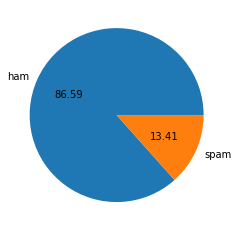

In [20]:
plt.pie(df["v1"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

## Split The Data Into Training & Testing Datasets

* The training dataset is used to train the model and the testing dataset is to test the model which has been trained with the training dataset.

In [21]:
x1_train,x1_test,x2_train,x2_test = train_test_split(x1,x2,test_size=0.2,random_state=3)

In [22]:
print(x1.shape)
print(x1_train.shape)
print(x1_test.shape)

(5572,)
(4457,)
(1115,)


## Prediction on training data

## Feature Extraction

* Feature extraction refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set.
* Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features).

## TfidfVectorizer

* Convert a collection of raw documents to a matrix of TF-IDF features.

In [23]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x1_train_feature=feature_extraction.fit_transform(x1_train)
x1_test_feature=feature_extraction.transform(x1_test)

x2_train= x2_train.astype('int')
x2_test=x2_test.astype('int')

In [24]:
print(x1_train_feature)

  (0, 753)	0.3221740480914799
  (0, 4011)	0.2412370145915408
  (0, 4331)	0.3894272295405569
  (0, 6655)	0.20311933545578326
  (0, 3416)	0.3221740480914799
  (0, 2141)	0.3847711628802525
  (0, 3162)	0.4404426291671822
  (0, 3290)	0.258962291438134
  (0, 3409)	0.21775030413940719
  (0, 4551)	0.2911807273986565
  (1, 4094)	0.380431198316959
  (1, 6931)	0.4306015894277422
  (1, 6472)	0.4769136859540388
  (1, 6497)	0.5652509076654626
  (1, 7509)	0.35056971070320353
  (2, 947)	0.4917598465723273
  (2, 2127)	0.42972812260098503
  (2, 3947)	0.40088501350982736
  (2, 2245)	0.413484525934624
  (2, 5879)	0.4917598465723273
  (3, 6195)	0.490566268030202
  (3, 1617)	0.5929266847710395
  (3, 1860)	0.37001355926569357
  (3, 7519)	0.5204542718787862
  (4, 2551)	0.7422865729680209
  :	:
  (4452, 2141)	0.3117428867080737
  (4453, 1013)	0.6760129013031282
  (4453, 7338)	0.5787739591782677
  (4453, 1780)	0.45610005640082985
  (4454, 3054)	0.4262945990163933
  (4454, 2104)	0.38106367960758625
  (4454, 3114

# Create Model Classification
## Model Training

* Now classifying the Iris flowers dataset using logistic regression. For creating the model, import LogisticRegression from the sci-kit learn library.

## _What is Logistic Regression ?_

*  Logistic Regression is used to find the relationship between dependent and independent variables. This is done by using a logistic regression equation. This is a very easy to implement, understand, and also easy method to train the model.

In [25]:
model=LogisticRegression()

In [26]:
model.fit(x1_train_feature,x2_train)

LogisticRegression()

## Acccuracy of Training and Testing model

In [27]:
prediction_training=model.predict(x1_train_feature)
accuracy_train=accuracy_score(x2_train,prediction_training)

In [28]:
print(accuracy_train)

0.9665694413282477


In [29]:
prediction_testing=model.predict(x1_test_feature)
accuracy_test=accuracy_score(x2_test,prediction_testing)

In [30]:
print(accuracy_test)

0.9632286995515695


## Prediction

In [34]:
input_mail=["I sincerely appreciate your flexibility and willingness to help. I wanted to express my personal gratitude for the effort and extra time you have contributed. Thank you for your support"]
input_feature=feature_extraction.transform(input_mail)
prediction=model.predict(input_feature)
print(prediction)
            
if (prediction[0]==1):
  print('ham mail')
else:
  print('spam mail')

[1]
ham mail
